# Anime recommendation based on user clustering

![imglink](http://img02.deviantart.net/42b7/i/2015/092/1/2/ultimate_anime_world_cup_by_cristyann-d8o38t3.jpg)

(Image taken from [imglink](http://img02.deviantart.net/42b7/i/2015/092/1/2/ultimate_anime_world_cup_by_cristyann-d8o38t3.jpg))

# Introduction

From anime dataset, I created recommendation system which use clustering technique.<br>
Recommended anime were extracted from characteristic of cluster.<br>
User was segmented by user anime rating history. (Select only movie which user really **like**)<br>



In this kernel,

 - Data wrangling
 - K mean clustering
 - Characteristic of each cluster


序章  
アニメのデータセットから、クラスタリング手法を用いたレコメンデーションシステムを作成しました.  
クラスターの特徴からおすすめアニメを抜粋  
ユーザーは、ユーザーのアニメの評価履歴によってセグメント化されました。 （ユーザーが本当に好きな映画のみを選択してください）  

このカーネルでは、

データラングリング  
Kはクラスタリングを意味します  
各クラスターの特徴  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
anime = pd.read_csv('./archive/anime.csv')

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
print(anime.shape)

(12294, 7)


In [5]:
user = pd.read_csv('./archive/rating.csv')

In [6]:
user.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [7]:
print(user.shape)

(7813737, 3)


# Likeの定義

多くのユーザーのために、アニメを評価するための多くの違いの基準。
次に、各ユーザーの評価平均を見つけることにしました。
ユーザーの評価平均よりも高い評価を得たアニメは、次のように割り当てられます

![imglink](http://matemnews.com/wp-content/uploads/2018/06/2011-08-31_072046_Facebook-Like-Button-big-500x242.jpg)


In [9]:
user[user['user_id']==1].rating

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
148   -1
149   -1
150   -1
151   -1
152   -1
Name: rating, Length: 153, dtype: int64

In [10]:
# ＃ユーザー1の評価平均がマイナス
user[user['user_id']==1].rating.mean()

-0.7124183006535948

In [11]:
# User 2 has a very low in rating mean

user[user['user_id']==2].rating.mean()

2.6666666666666665

In [12]:
# Rating mean of user 5 is very close to 5 which is half of max rating

user[user['user_id']==5].rating.mean()

4.263383297644539

### Calculate mean rating per user

In [13]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [14]:
MRPU.head(10)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
5,6,-1.000000
6,7,7.387755
7,8,8.333333
8,9,8.000000
9,10,2.875000


In [15]:
user = pd.merge(user,MRPU,on=['user_id','user_id'])

In [16]:
user.head(5)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [17]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [18]:
# 3つのアニメがユーザーの1つのお気に入りのアニメとして割り当てられました

user[user['user_id']== 1].head(10)

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


In [19]:
# user2 favorite only one anime

user[user['user_id']== 2].head(10)

,user_id,anime_id,rating,mean_rating
153,2,11771,10,2.666667


In [20]:
user[user['user_id']== 5].head(10)

,user_id,anime_id,rating,mean_rating
302,5,6,8,4.263383
303,5,15,6,4.263383
304,5,17,6,4.263383
305,5,18,6,4.263383
306,5,20,6,4.263383
307,5,22,5,4.263383
310,5,45,7,4.263383
311,5,47,8,4.263383
312,5,57,7,4.263383
314,5,67,6,4.263383


In [21]:
print(user.shape)

(4262566, 4)


In [22]:
user["user_id"].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516])

In [23]:
user = user.rename({'rating':'userRating'}, axis='columns')

## Combine two datasets

       In this kernel, I decide to reduce size of dataset, because of running time

In [24]:
# merge 2 dataset
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
mergedata.head(10)

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328


In [25]:
len(mergedata['anime_id'].unique())

7852

In [26]:
len(anime['anime_id'].unique())

12294

## Create Crosstable 

    Show detail of anime which each user like

In [27]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
user_anime.shape

(20000, 7852)

## Principal component analysis

        Principal Component Analysis converts our original variables to a new set of variables, 
    which are a linear combination of the original set of variables.
    My main goal is to reduce dimension of data for clustering and visualize

主成分分析
     主成分分析は、元の変数を新しい変数のセットに変換します。
これは、元の変数セットの線形結合です。
私の主な目標は、クラスタリングと視覚化のためにデータの次元を削減することです 

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [30]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415767
1,-1.773553,-0.272593,0.116389
2,0.218814,-1.232282,-0.985800
3,0.199435,-0.291005,0.681043
4,3.532125,-0.184796,-0.743325


In [31]:
tocluster = pd.DataFrame(ps[[0,1,2]])

/var/folders/g6/qtvrbqf960v1l069d_0yh2lc0000gn/T/ipykernel_45277/3788341694.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


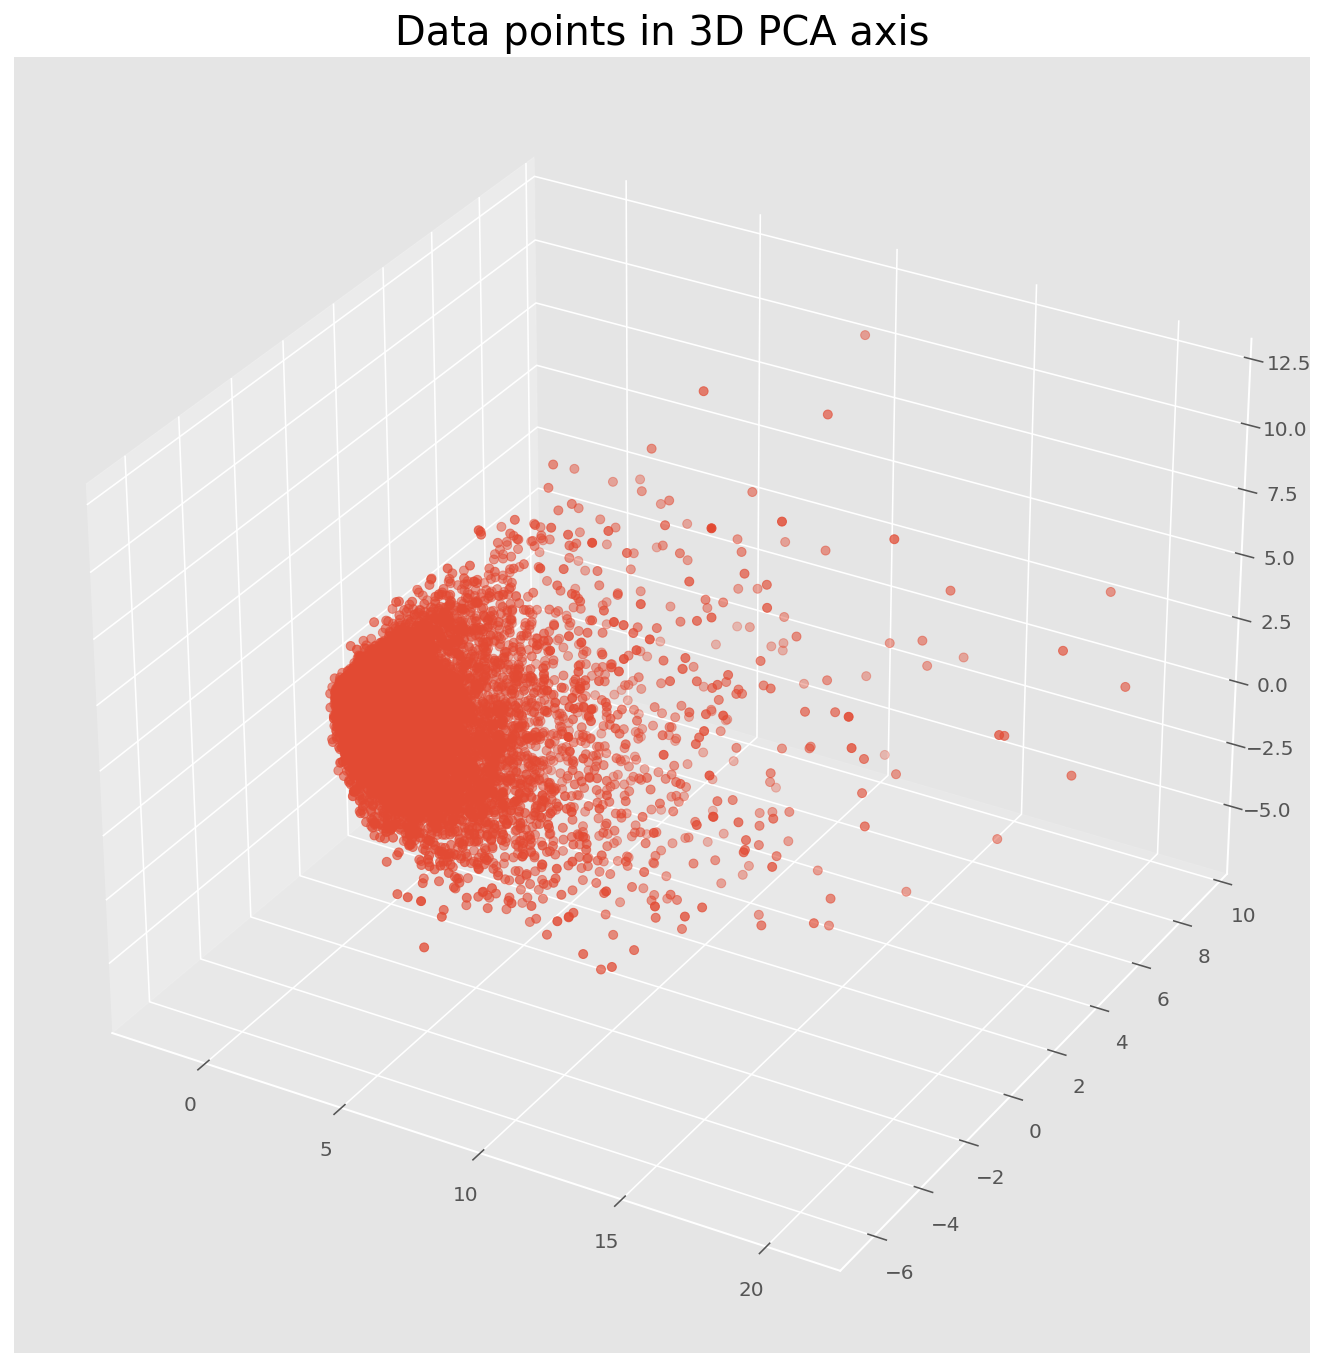

In [32]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()


## Selecting number of k

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))
    

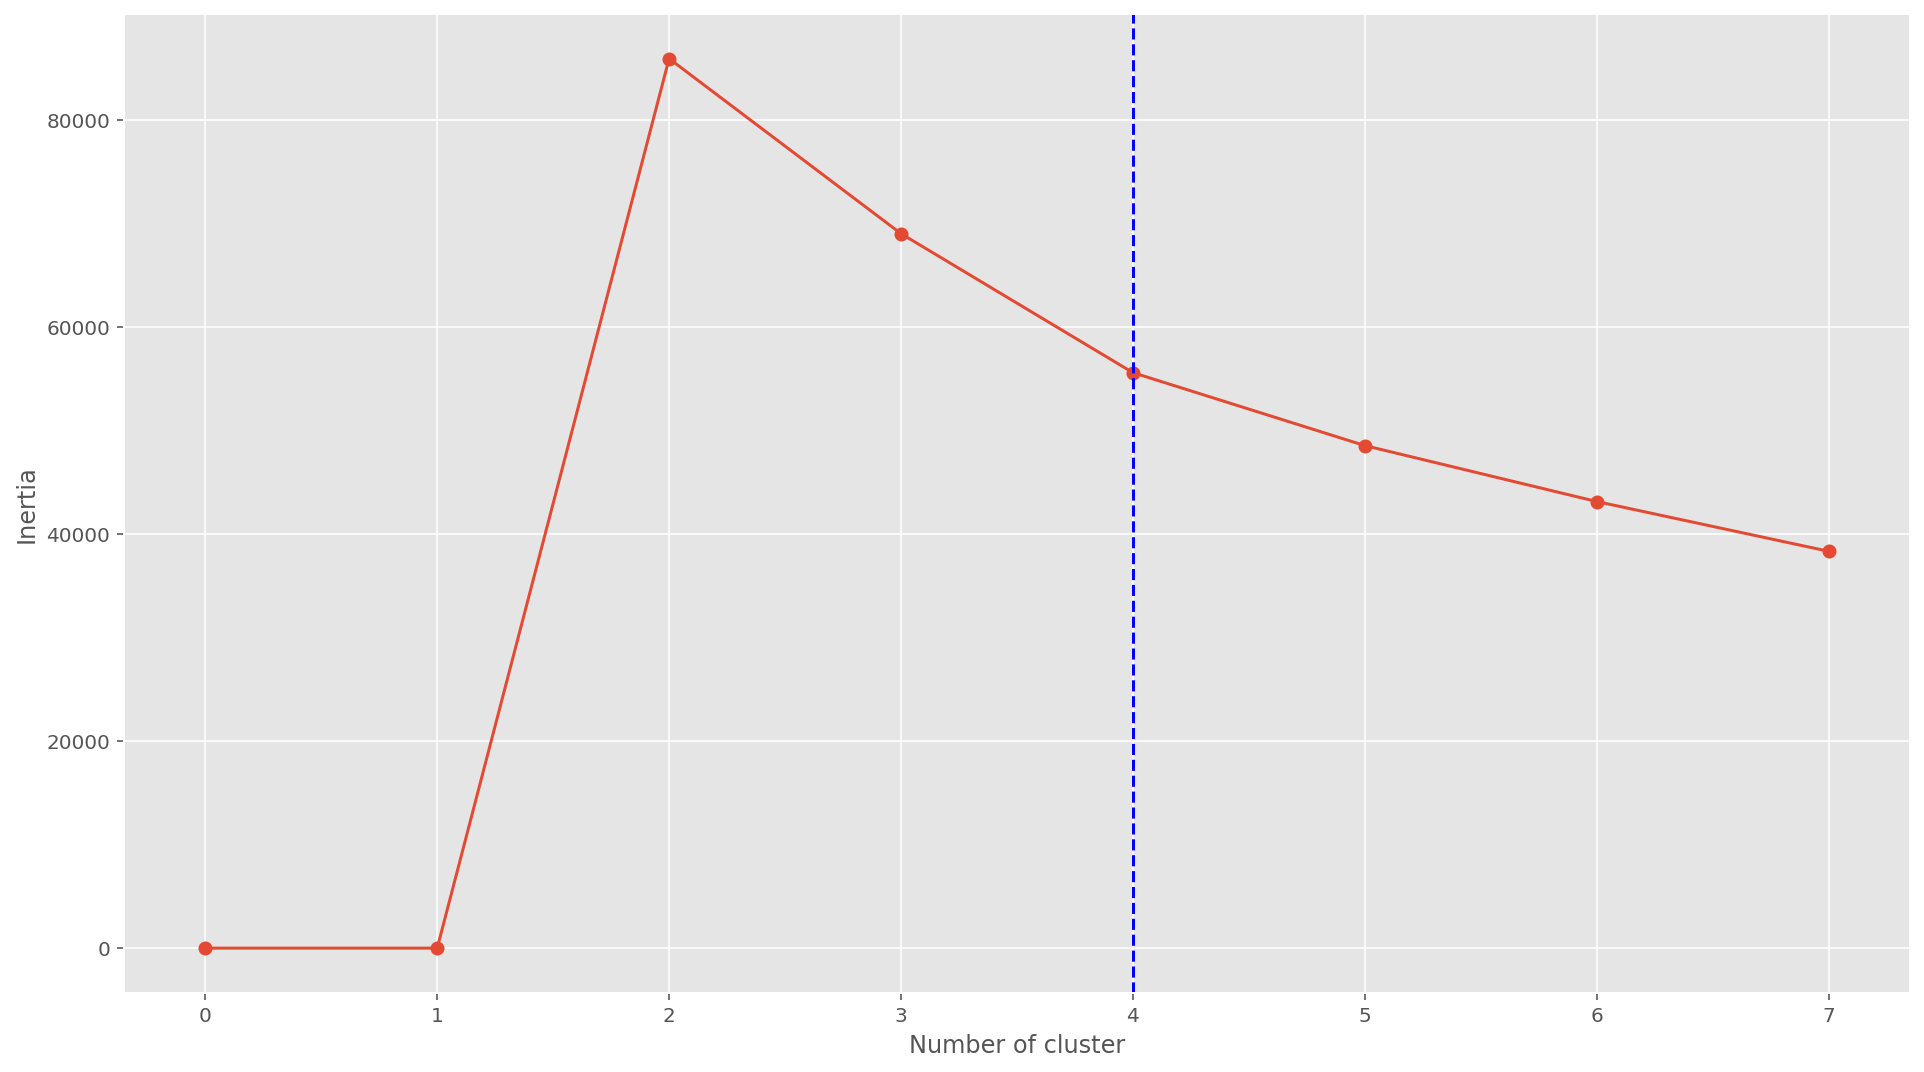

In [34]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

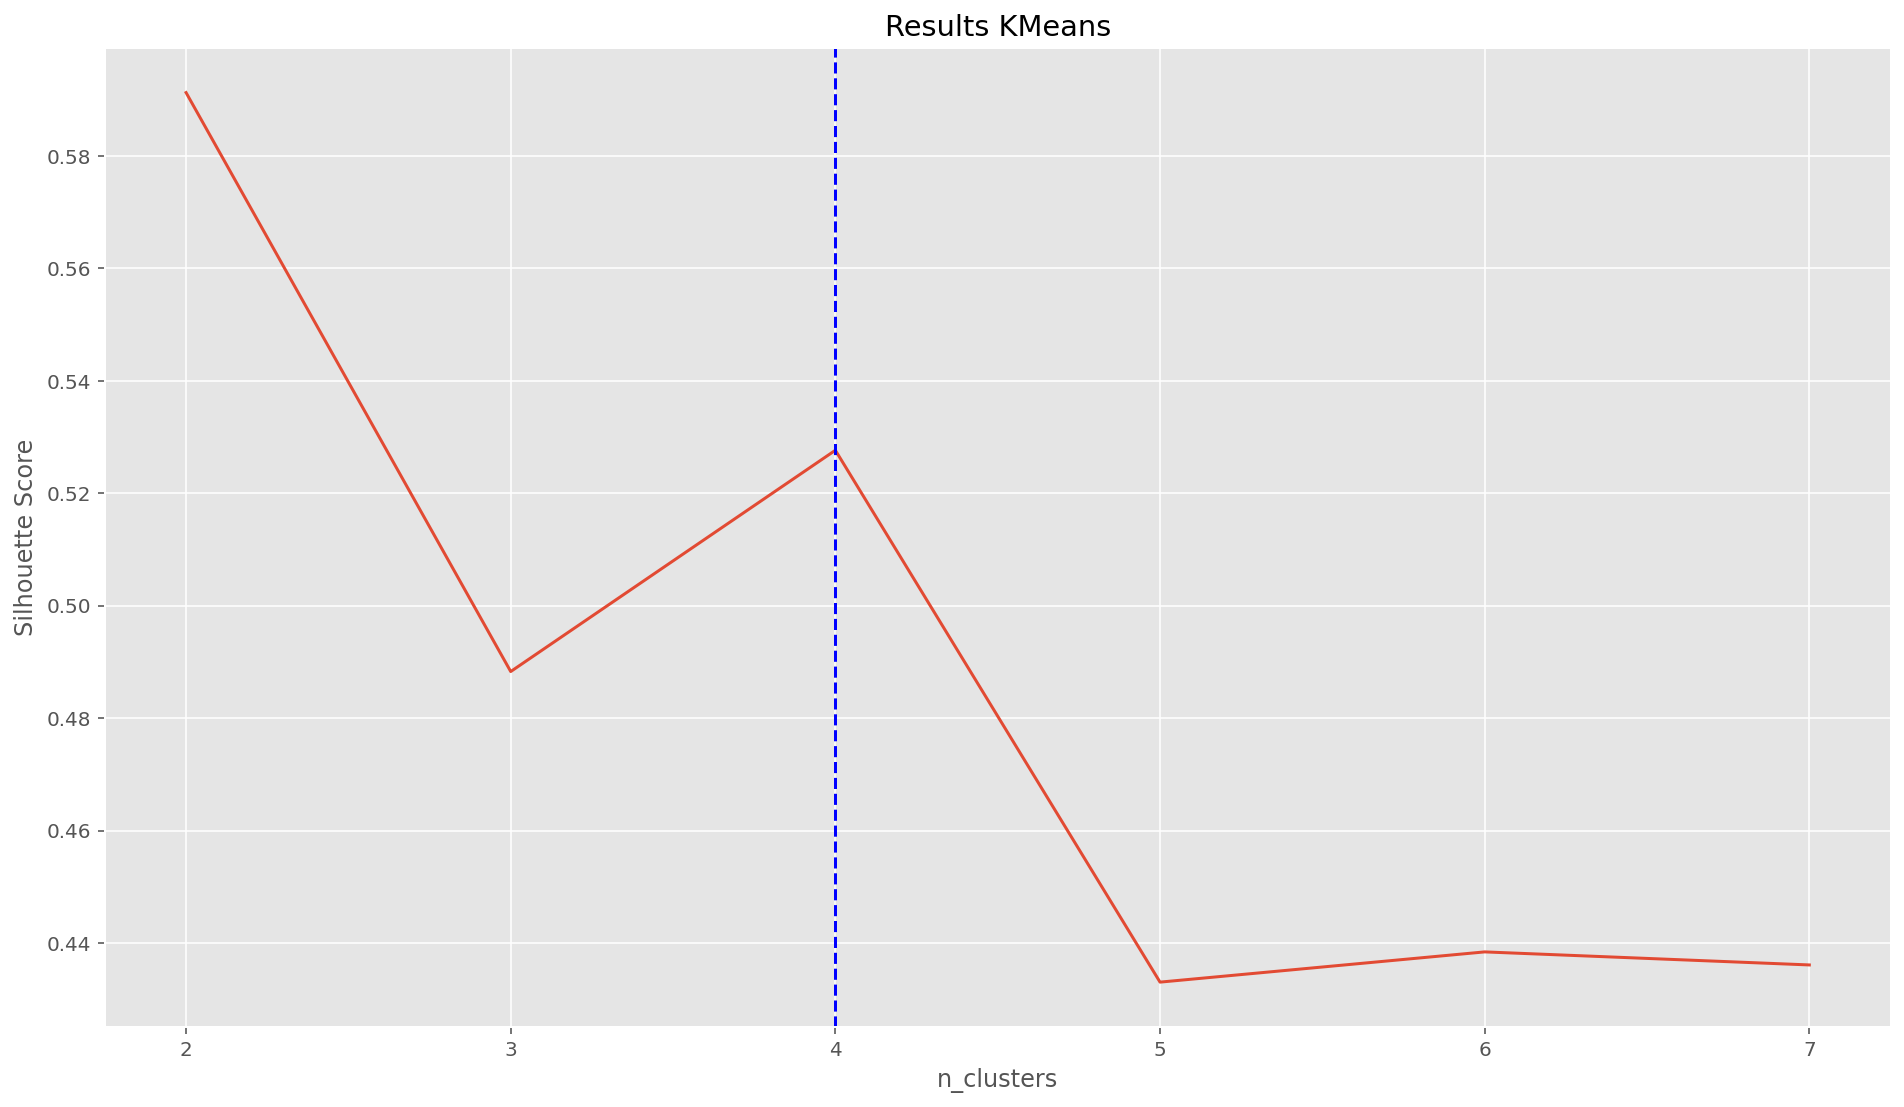

In [35]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

## K means clustering

In [36]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-1.08874971 -0.04026583  0.06666433]
 [ 7.61700382 -0.64256848  0.83955526]
 [ 1.6784451   2.31533839 -0.02522615]
 [ 1.97875213 -1.1265422  -0.43514656]]


/var/folders/g6/qtvrbqf960v1l069d_0yh2lc0000gn/T/ipykernel_45277/1968849231.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


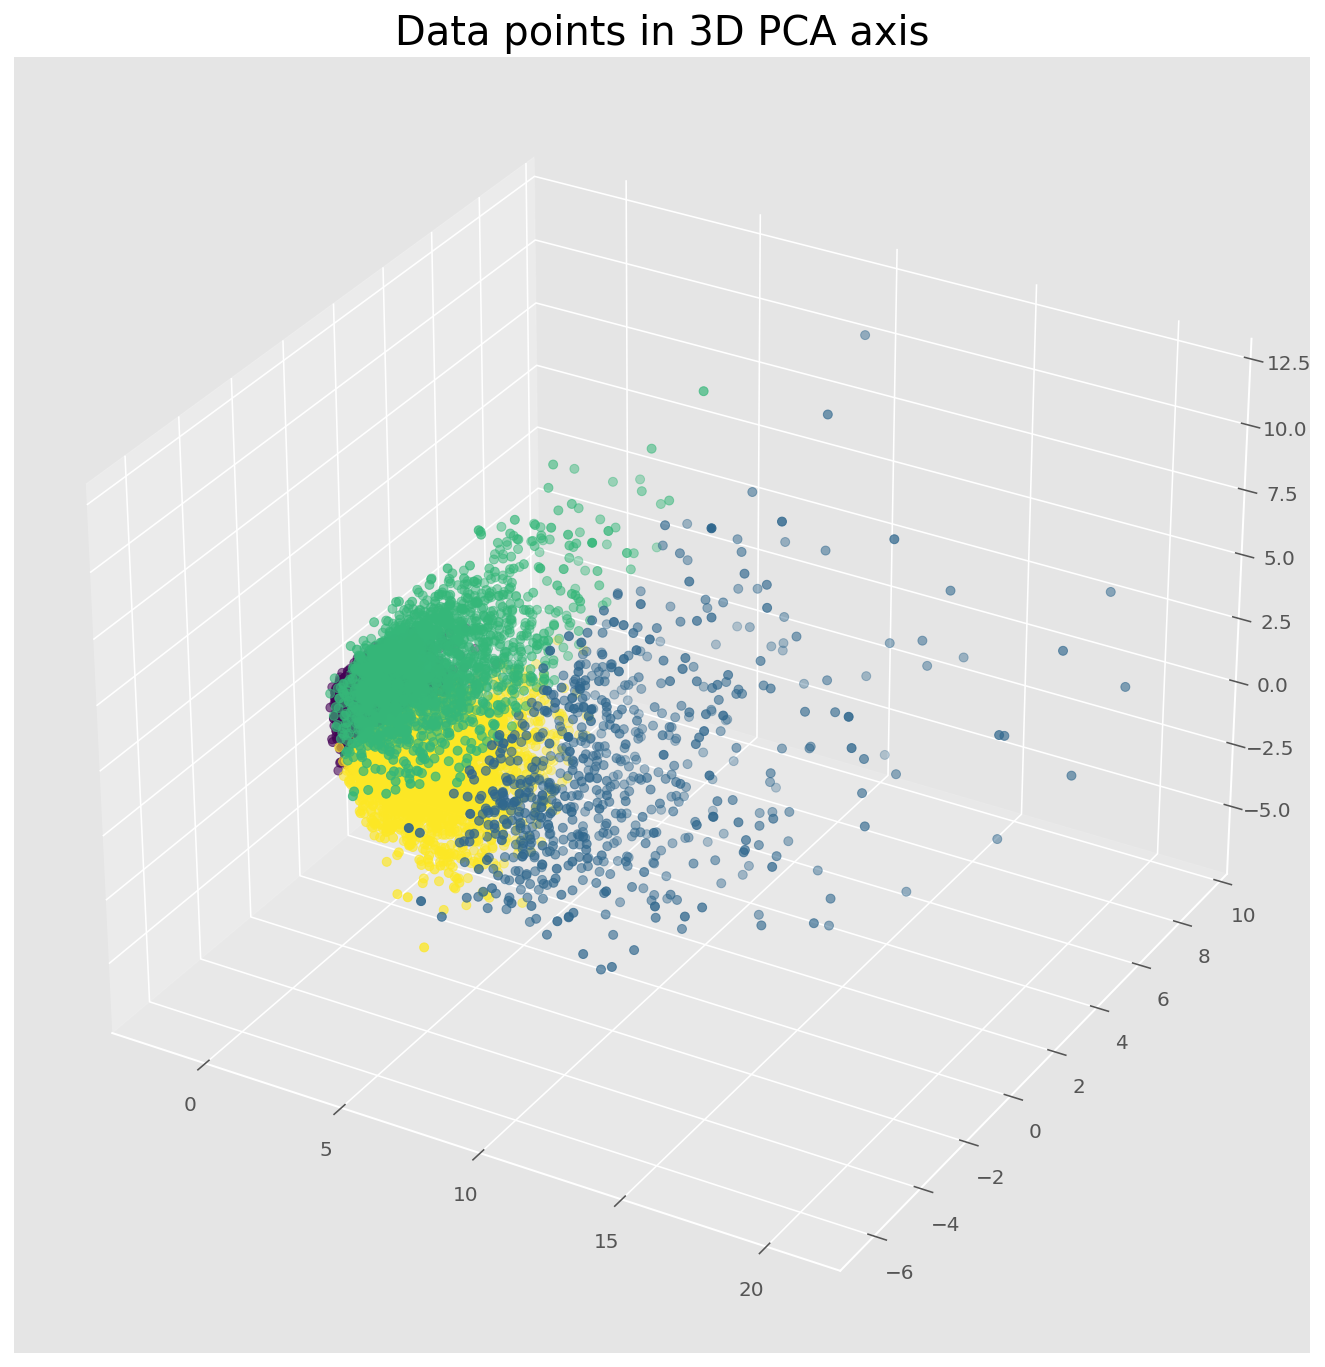

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

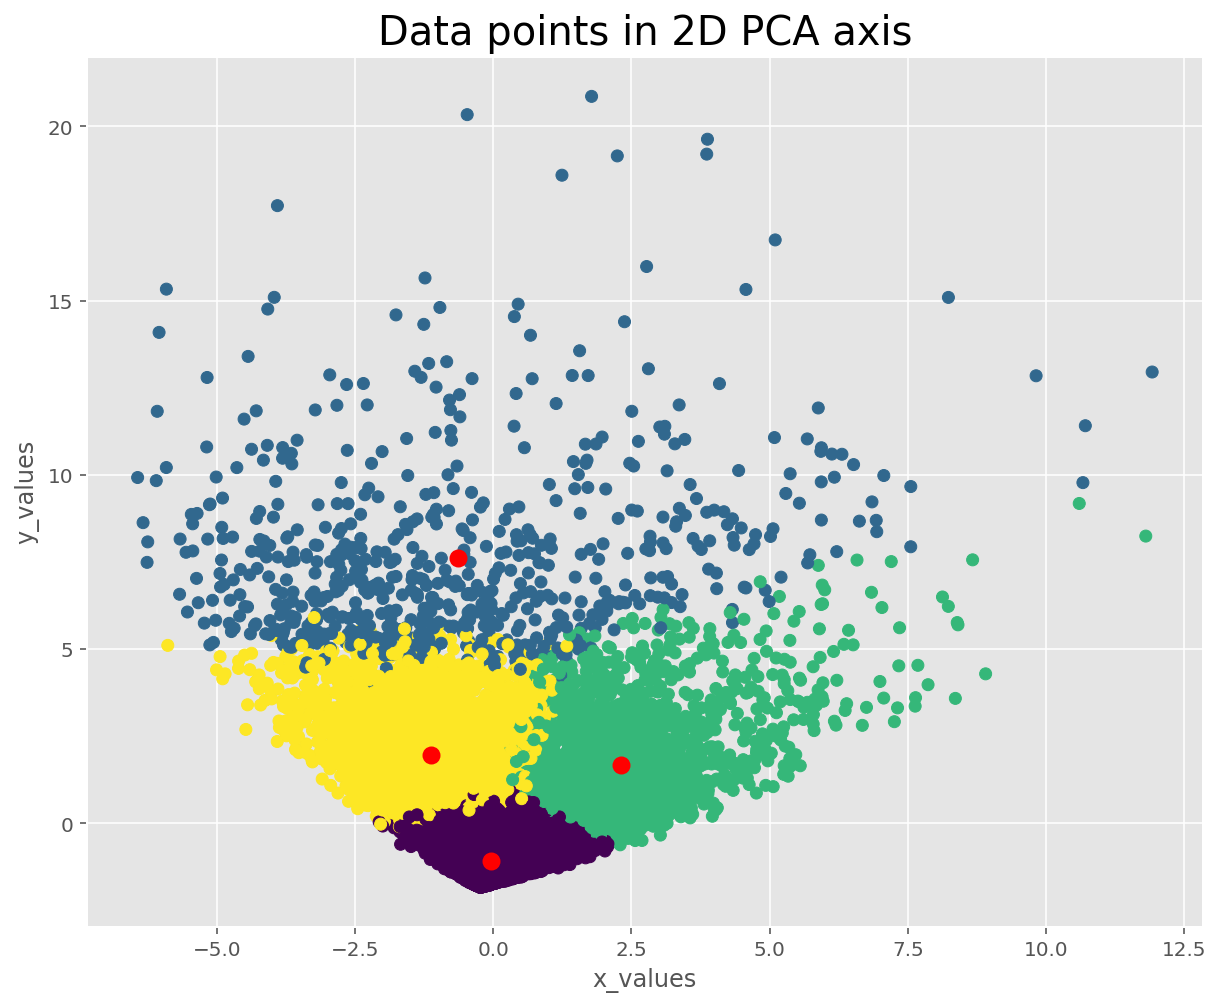

In [38]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [39]:
user_anime['cluster'] = c_preds


user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Columns: 7853 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to cluster
dtypes: int32(1), int64(7852)
memory usage: 1.2 GB


## Characteristic of each cluster

In [41]:

c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()


### Cluster 0

    Top 15 anime which will explain characteristic of this cluster

クラスター0
このクラスターの特徴を説明するトップ15のアニメ

In [42]:
c0.sort_values(ascending=False)[0:15]

name
Death Note                            0.320642
Shingeki no Kyojin                    0.230444
Sword Art Online                      0.198824
Fullmetal Alchemist: Brotherhood      0.181616
Code Geass: Hangyaku no Lelouch       0.178820
Sen to Chihiro no Kamikakushi         0.159963
Angel Beats!                          0.157095
Fullmetal Alchemist                   0.155661
Code Geass: Hangyaku no Lelouch R2    0.153510
Naruto                                0.146125
Elfen Lied                            0.144045
Ouran Koukou Host Club                0.133792
Mirai Nikki (TV)                      0.121388
Toradora!                             0.117803
Howl no Ugoku Shiro                   0.114433
dtype: float64

In [43]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list
         

In [44]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [45]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)


In [51]:
data.head()

,genre,episode,rating,member
0,"Drama, Romance, School, Supernatural",[1],[9],[200630]
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...",[64],[9],[793665]
2,"Action, Comedy, Historical, Parody, Samurai, S...",[51],[9],[114262]
3,"Sci-Fi, Thriller",[24],[9],[673572]
4,"Action, Comedy, Historical, Parody, Samurai, S...",[51],[9],[151266]


In [46]:

set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)


In [48]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

    Favorite genre for this cluster 

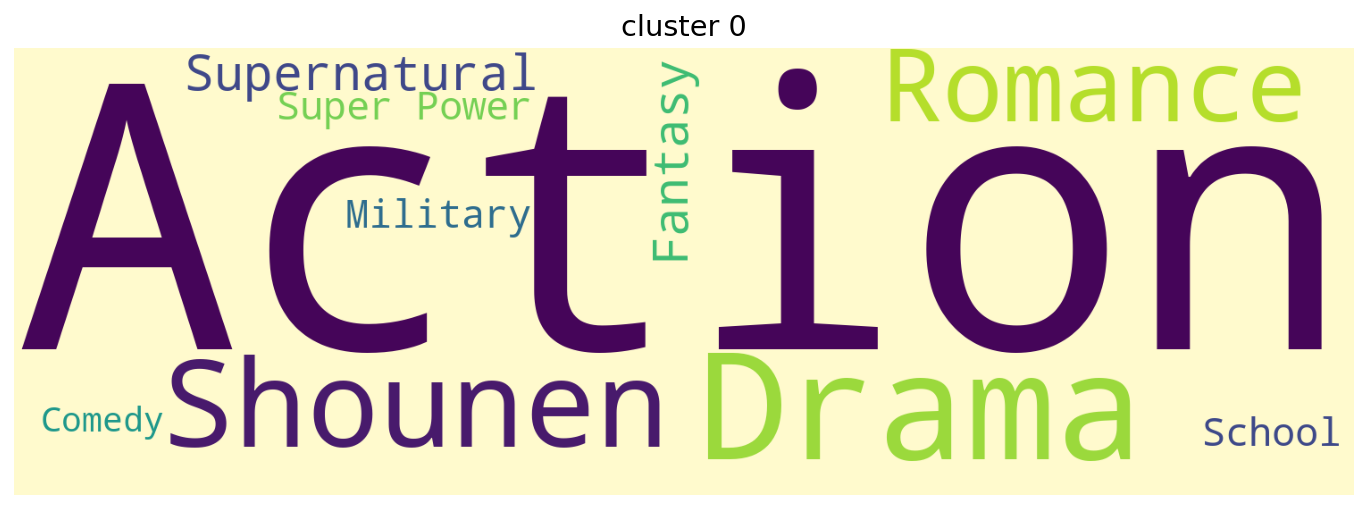

In [49]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [50]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Shounen', 5],
 [' Romance', 5],
 [' Supernatural', 5]]

    Average of each information for anime which user in this cluster like

In [52]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


### Cluster 1

In [53]:
c1.sort_values(ascending=False)[0:15]

name
Angel Beats!                                           0.836524
No Game No Life                                        0.818851
Toradora!                                              0.815906
Code Geass: Hangyaku no Lelouch                        0.804124
Steins;Gate                                            0.792342
Shingeki no Kyojin                                     0.783505
Code Geass: Hangyaku no Lelouch R2                     0.777614
Sword Art Online                                       0.768778
Bakemonogatari                                         0.756996
Death Note                                             0.755523
Hataraku Maou-sama!                                    0.730486
Fullmetal Alchemist: Brotherhood                       0.730486
Clannad                                                0.724595
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.720177
Chuunibyou demo Koi ga Shitai!                         0.718704
dtype: float64

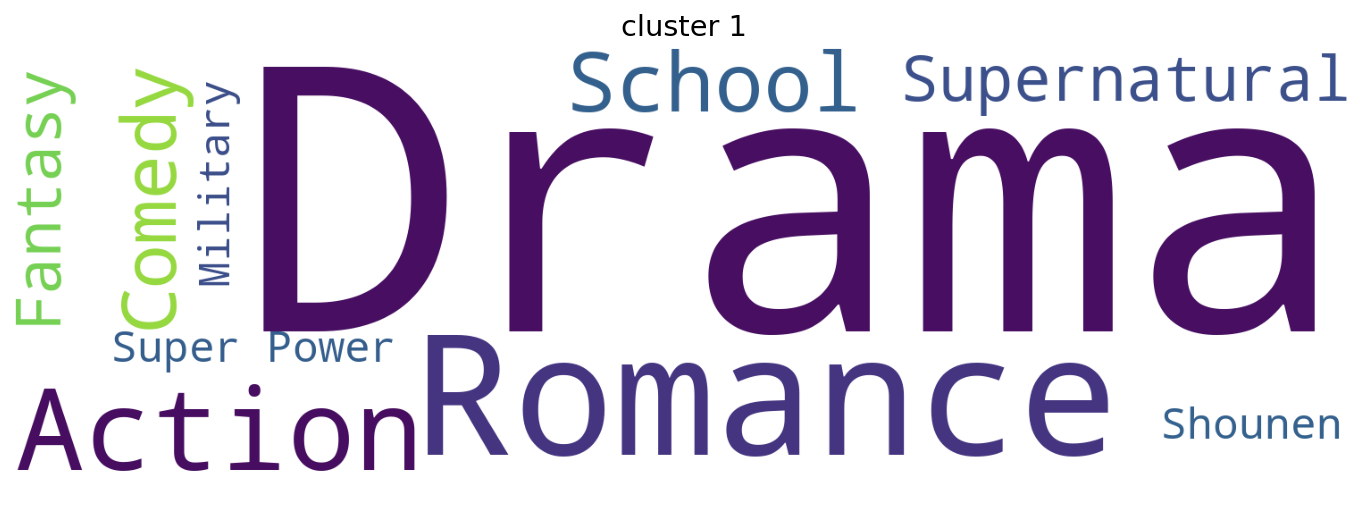

In [54]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [55]:
keyword_occurences[0:5]

[[' Drama', 7], [' Romance', 7], ['Action', 6], [' School', 6], ['Comedy', 5]]

In [56]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 23.4
AVG movie rating : 8.0
AVG member : 647913.0666666667


### Cluster 2

In [57]:
c2.sort_values(ascending=False)[0:15]

name
Death Note                            0.680644
Code Geass: Hangyaku no Lelouch       0.668454
Code Geass: Hangyaku no Lelouch R2    0.609459
Fullmetal Alchemist                   0.600195
Sen to Chihiro no Kamikakushi         0.583618
Suzumiya Haruhi no Yuuutsu            0.551438
Neon Genesis Evangelion               0.537786
Tengen Toppa Gurren Lagann            0.529498
Cowboy Bebop                          0.525110
Fullmetal Alchemist: Brotherhood      0.509995
Mononoke Hime                         0.499756
Toradora!                             0.489030
Elfen Lied                            0.484154
Howl no Ugoku Shiro                   0.479766
Samurai Champloo                      0.477328
dtype: float64

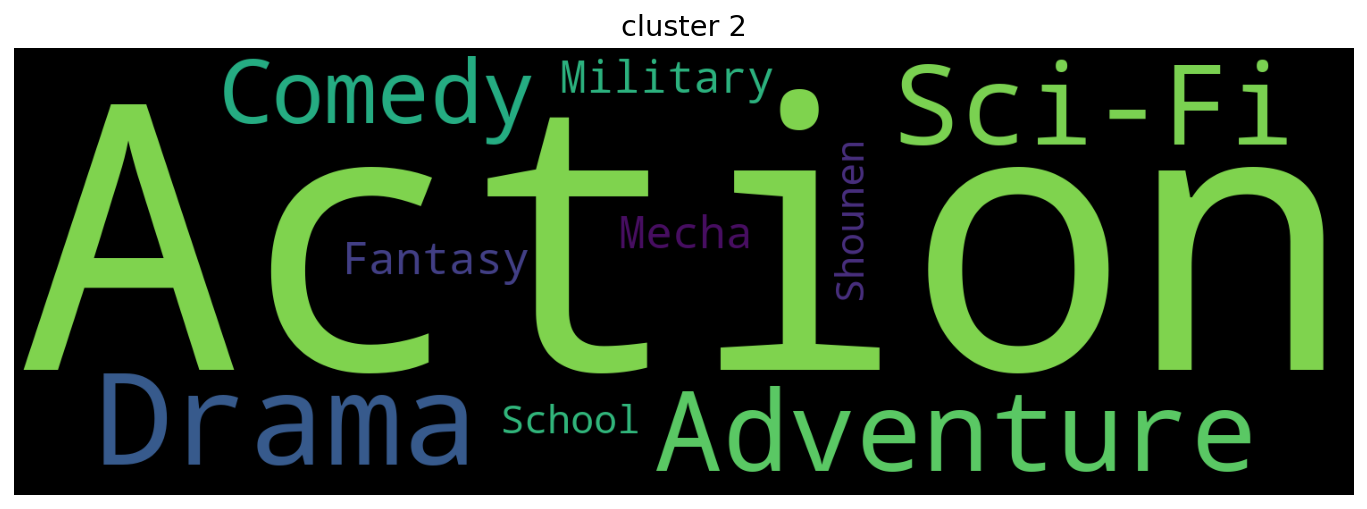

In [58]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")

In [59]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Adventure', 6],
 [' Sci-Fi', 6],
 [' Comedy', 4]]

In [60]:
c2_data['episode'].mean()

24.133333333333333

In [61]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333


### Cluster 3

In [62]:
c3.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.726753
No Game No Life                                             0.644598
Sword Art Online                                            0.613602
Angel Beats!                                                0.598255
Death Note                                                  0.591032
Steins;Gate                                                 0.551610
Fullmetal Alchemist: Brotherhood                            0.539874
Toradora!                                                   0.517605
Mirai Nikki (TV)                                            0.513993
Code Geass: Hangyaku no Lelouch                             0.506169
Code Geass: Hangyaku no Lelouch R2                          0.478182
Noragami                                                    0.464941
One Punch Man                                               0.464039
Tokyo Ghoul                                                 0.462534
Ano Hi Mita Hana no Namae wo 

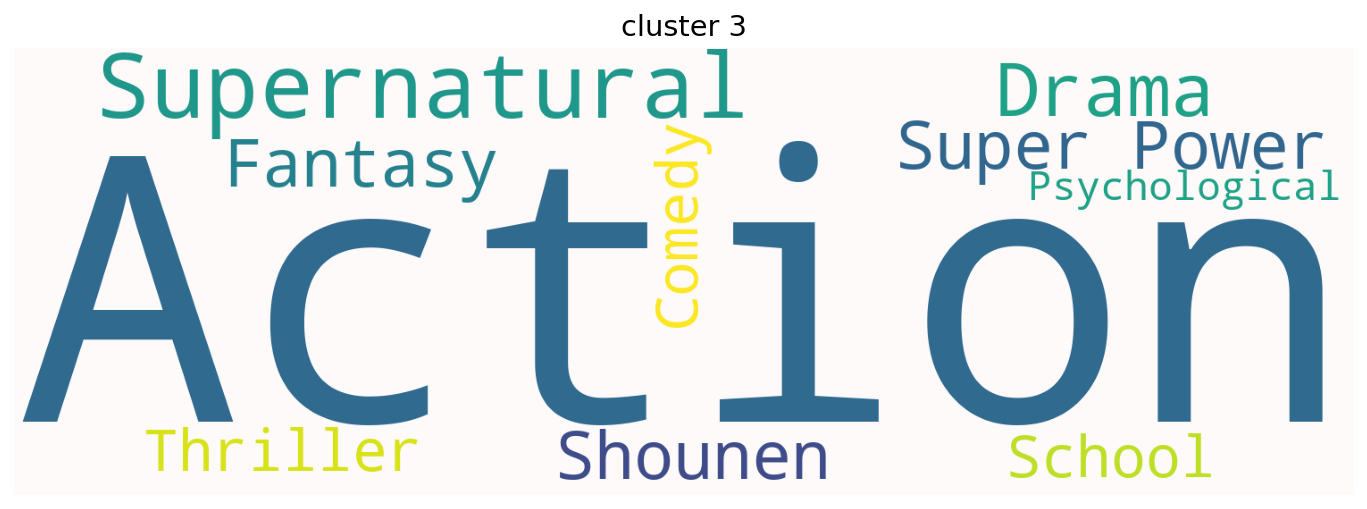

In [63]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [64]:
keyword_occurences[0:5]

[['Action', 10],
 [' Supernatural', 8],
 [' Drama', 5],
 [' Super Power', 4],
 [' Shounen', 4]]

In [65]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2


        Thank you for read till the end.
        After this work, we can use cluster feature for recommend some anime
        that suit with character of each cluster.
        Apart from content and collaborative recommendation,
        This is an alternative method for giving a differences taste of recommendation to user. 
        